# HW02 Machine Learning

## Table Of Content
##### 1. [Data](#data-header)

1. [Data Collection](#data-collection)
2. [Understanding the Data](#understand-data)
3. [Data Cleaning](#data-cleaning)

##### 2. [Data Visualization](#viz-header)

1. [Colerration matrix?](#id)
2. [Correlation between features](#id)
3. [and more](#id)

##### 3. [Clustering](#clustering-header)

1. [Kmeans](#kmeans)
2. [؟؟](#id)

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

import re
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from itertools import compress
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances



# 1. Data <a class="anchor" id="data-header"></a>
## 1.1. Data Collection <a class="anchor" id="data-collection"></a>

In [2]:
# Get all csv's

data_path = r'data\\21'
c21 = pd.read_csv(os.path.join(data_path, "expc.csv"), header=0)
b21 = pd.read_csv(os.path.join(data_path, "expb.csv"), header=0)

data_path = r'data\\22'
c22 = pd.read_csv(os.path.join(data_path, "expc.csv"), header=0)
b22 = pd.read_csv(os.path.join(data_path, "expb.csv"), header=0)

data_path = r'data\\23'
c23 = pd.read_csv(os.path.join(data_path, "expc.csv"), header=0)
b23 = pd.read_csv(os.path.join(data_path, "expb.csv"), header=0)

data_path = r'data'
bycode = pd.read_excel(os.path.join(data_path, "bycode2018.xlsx"), header=0)
index = pd.read_excel(os.path.join(data_path, "index 2018.xlsx"))

## 1.2. Understanding the Data <a class="anchor" id="understand-data"></a>

In [38]:
bycode.head(5)

,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2018,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
0,שחר,7,SHAHAR,6,61,612.0,50.0,NaN,1.0,875.0,...,1955,310,1.0,1.739861e+09,83.0,634.0,10001813.0,2018,Shahar,NaN
1,תירוש,10,TIROSH,1,11,112.0,26.0,NaN,1.0,501.0,...,1955,310,2.0,1.892863e+09,130.0,151.0,15000597.0,2018,Tirosh,NaN
2,"ניר ח""ן",11,NIR HEN,6,61,612.0,50.0,NaN,1.0,552.0,...,1955,310,1.0,1.729761e+09,91.0,634.0,10001813.0,2018,Nir Hen,NaN
3,חצבה,13,HAZEVA,6,62,625.0,54.0,NaN,1.0,605.0,...,1965,310,1.0,2.266752e+09,-160.0,657.0,10001918.0,2018,Hazeva,610.0
4,נועם,15,NO'AM,6,61,612.0,34.0,NaN,1.0,349.0,...,1955,310,2.0,1.799961e+09,148.0,631.0,10001813.0,2018,No'am,NaN


In [37]:
bycode.columns.values

array(['שם יישוב', 'סמל יישוב', 'תעתיק', 'מחוז', 'נפה', 'אזור טבעי',
       'מעמד מונציפאלי', 'שיוך מטרופוליני', 'דת יישוב',
       'סך הכל אוכלוסייה 2018', 'יהודים ואחרים', 'מזה: יהודים', 'ערבים',
       'שנת ייסוד', 'צורת יישוב שוטפת', 'השתייכות ארגונית', 'קואורדינטות',
       'גובה', 'ועדת תכנון', 'מרחב משטרה', 'שנה', 'שם יישוב באנגלית',
       'אשכול רשויות מקומיות'], dtype=object)

In [40]:
features = bycode[['מעמד מונציפאלי','שם יישוב באנגלית','אזור טבעי','סמל יישוב','מחוז']]
features = features.rename(columns={'סמל יישוב': 'סמל ישוב'})
features

,מעמד מונציפאלי,שם יישוב באנגלית,אזור טבעי,סמל ישוב,מחוז
0,50.0,Shahar,612.0,7,6
1,26.0,Tirosh,112.0,10,1
2,50.0,Nir Hen,612.0,11,6
3,54.0,Hazeva,625.0,13,6
4,34.0,No'am,612.0,15,6
...,...,...,...,...,...
1477,0.0,Yehud,422.0,9400,4
1478,0.0,Qiryat Bialik,311.0,9500,3
1479,0.0,Qiryat Yam,311.0,9600,3
1480,0.0,Hod HaSharon,421.0,9700,4


## 1.3. Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [5]:
# Didnt really use these ones

for col in df2.columns[2:-1]:
        if df2[col].sum() < 13000:
            df2 = df2.drop(col, axis=1)

NameError: name 'df2' is not defined

In [6]:
settl_top = df2.sum(axis=1).reset_index()
    settl_top.columns = ['settlement', 'values']
    settl_top = settl_top.sort_values('values', ascending=False)
    settl_top['percent'] = round(settl_top['values'] / settl_top['values'].sum() * 100, 2)
    settl_top['settlement'] = df2['settlement']

IndentationError: unexpected indent (<ipython-input-6-cad2a9ccf1e6>, line 2)

###### Select columns
locations = c21['שם ישוב']
sizes = c21['מצביעים']
df = c21.drop(['סמל ועדה', 'בזב', 'Unnamed: 37', 'פסולים', 'כשרים', 'מצביעים','סמל ישוב'], axis=1)
df_withid = c21.drop(['בזב', 'Unnamed: 37'], axis=1)
df_withid

# 2. Data Visualization <a class="anchor" id="viz-header"></a>
## ???  <a class="anchor" id="data-collection"></a>

In [131]:
# The biggest settlements
df = df.groupby('שם ישוב').sum()
settl_top = df.sum(axis=1).reset_index()
settl_top.columns = ['settlement', 'values']
settl_top = settl_top.sort_values('values', ascending=False)
settl_top['percent'] = round(settl_top['values']/settl_top['values'].sum()*100, 2)

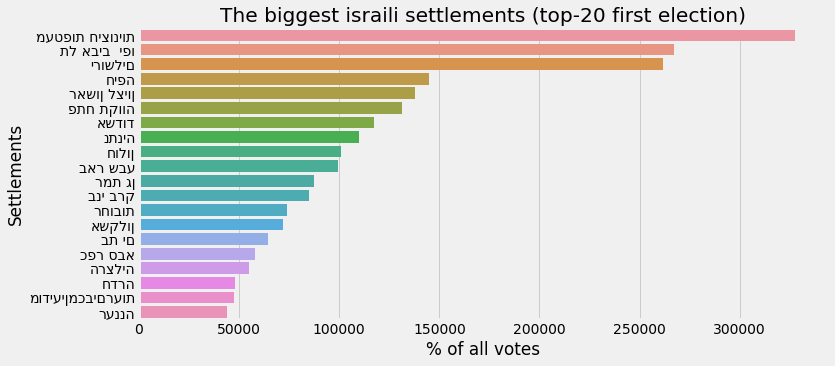

In [132]:
import seaborn as sns
# Plot "The biggest israili settlements"
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
sns.barplot(y='settlement', x='values', data=settl_top.head(20))
plt.title('The biggest israili settlements (top-20 first election)')
plt.ylabel('Settlements')
plt.xlabel('% of all votes')
plt.show()

In [133]:
# Top-10 parties
party_top = df.sum().reset_index()
party_top.columns = ['party', 'values']
party_top = party_top.sort_values('values', ascending=False)
party_top['percent'] = round(party_top['values']/party_top['values'].sum()*100, 2)

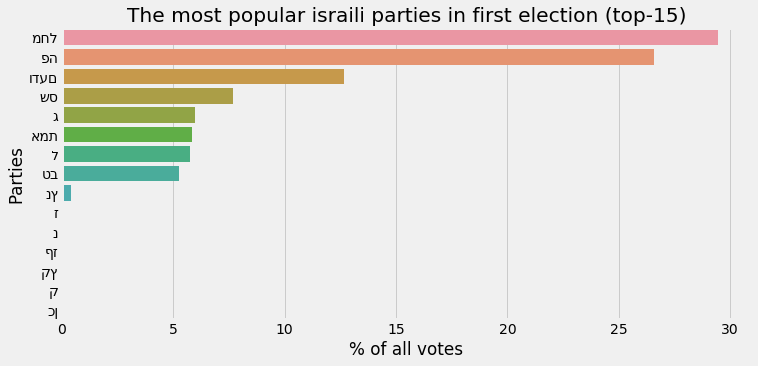

In [134]:
# Plot "The most popular israili parties in 2015"
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111)
sns.barplot(y='party', x='percent', data=party_top.head(15))
plt.title('The most popular israili parties in first election (top-15)')
plt.ylabel('Parties')
plt.xlabel('% of all votes')
plt.show()

In [136]:
df2 = df_withid.copy()
for col in df2.columns[6:-1]:
        if df2[col].sum() < 450000:
            df2 = df2.drop(col, axis=1)
df2

,סמל ועדה,שם ישוב,סמל ישוב,מצביעים,פסולים,כשרים,ודעם,מחל,פה,שס
0,18,אבו גווייעד שבט,967,595,6,589,554,4,8,2
1,2,אבו גוש,472,2718,36,2682,2157,280,123,14
2,6,אבו סנאן,473,6090,53,6037,4458,190,752,247
3,18,אבו עבדון שבט,958,41,1,40,40,0,0,0
4,18,אבו קורינאת שבט,968,1336,8,1328,1263,8,33,0
...,...,...,...,...,...,...,...,...,...,...
1209,18,תקומה,665,416,2,414,0,161,63,12
1210,2,תקוע,3563,1619,4,1615,3,583,85,34
1211,18,תראבין אצאנע שבט,970,48,0,48,43,0,4,0
1212,18,תראבין אצאנעישוב,1346,206,0,206,160,40,2,0


In [137]:
settl = settl_top.head(11)
settl = settl.drop(settl.index[0])
settl

,settlement,values,percent
1189,תל אביב יפו,267115,5.82
494,ירושלים,261589,5.70
406,חיפה,144625,3.15
1058,ראשון לציון,137894,3.00
989,פתח תקווה,131489,2.86
114,אשדוד,117619,2.56
861,נתניה,109763,2.39
393,חולון,101066,2.20
129,באר שבע,99266,2.16
1087,רמת גן,87421,1.90


In [138]:
joined = pd.merge(df2, features,  how='left', left_on=['סמל ישוב'], right_on = ['סמל ישוב'])
#joined = joined.drop(['שם ישוב','סמל ישוב'],axis=1)
joined = joined.drop(['שם ישוב','סמל ישוב', 'שם יישוב באנגלית', 'מעמד מונציפאלי'],axis=1)

joined = joined.rename(columns={'סמל ועדה':'Committee symbol', 'אמת': 'Emet', 'ודעם': 'Wadaam', 'מצביעים': 'Voters', 'כשרים': 'Qualified', 'פסולים': 'Disqualified','מחל': 'Mahal','נץ': 'Nets', 'פה':'Poo', 'שס':'Shas'})
joined = joined.rename(columns={'מחוז':'District', 'אזור טבעי': 'Natural area', 'שם יישוב באנגלית':'Committee'})
joined.columns.values

array(['Committee symbol', 'Voters', 'Disqualified', 'Qualified',
       'Wadaam', 'Mahal', 'Poo', 'Shas', 'Natural area', 'District'],
      dtype=object)

In [141]:
#ugly plot
#pd.plotting.scatter_matrix(joined,figsize=(20,20), marker='o', hist_kwds={'bins': 20}, )
#plt.show()

In [147]:
import plotly.express as px

fig = px.scatter_matrix(joined, color="Voters", title="Scatter matrix of features",width=1000,
    height=1000, dimensions=['Voters', 'Disqualified', 'Qualified','Natural area', 'District'])

fig.show()

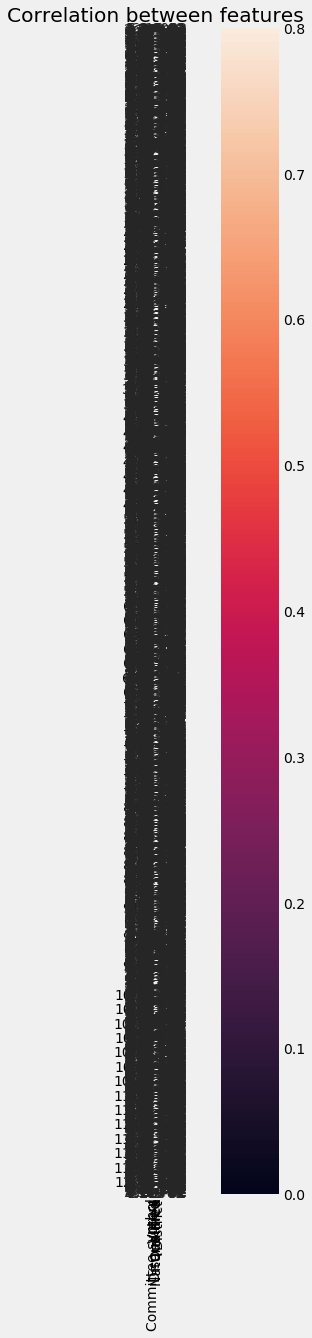

In [151]:
for_heatmap = joined.drop(['Wadaam', 'Mahal', 'Poo', 'Shas'], axis=1)
plt.figure(figsize=(20, 20))

sns.heatmap(for_heatmap, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');



# 3. Clustering <a class="anchor" id="clustering-header"></a>

In [39]:
normalized_df = df.drop(['שם ישוב'], axis=1)
normalized_df = normalized_df[normalized_df.sum().sort_values(ascending=False).index]
normalized_df = normalized_df.truediv(normalized_df.sum(axis=1), axis=0)
normalized_df

,מחל,פה,ודעם,שס,ג,אמת,ל,טב,נץ,ז,...,כ,קי,יק,ני,יז,י,יר,יף,זך,זץ
0,0.006791,0.013582,0.940577,0.003396,0.000000,0.022071,0.001698,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.001698,0.000000,0.000000,0.000000,0.000000,0.0
1,0.104400,0.045861,0.804251,0.005220,0.001491,0.027964,0.001864,0.001864,0.001119,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000373,0.000373,0.000000,0.0
2,0.031473,0.124565,0.738446,0.040914,0.000994,0.015239,0.038098,0.002650,0.000497,0.000000,...,0.000166,0.000166,0.0,0.000166,0.000331,0.000166,0.000166,0.000331,0.000166,0.0
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.006024,0.024849,0.951054,0.000000,0.000000,0.006777,0.000000,0.000753,0.000753,0.000000,...,0.000000,0.000000,0.0,0.001506,0.000000,0.000000,0.000753,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.388889,0.152174,0.000000,0.028986,0.012077,0.012077,0.002415,0.393720,0.004831,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1210,0.360991,0.052632,0.001858,0.021053,0.020433,0.017337,0.021672,0.470588,0.017957,0.004334,...,0.003096,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1211,0.000000,0.083333,0.895833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.0
1212,0.194175,0.009709,0.776699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


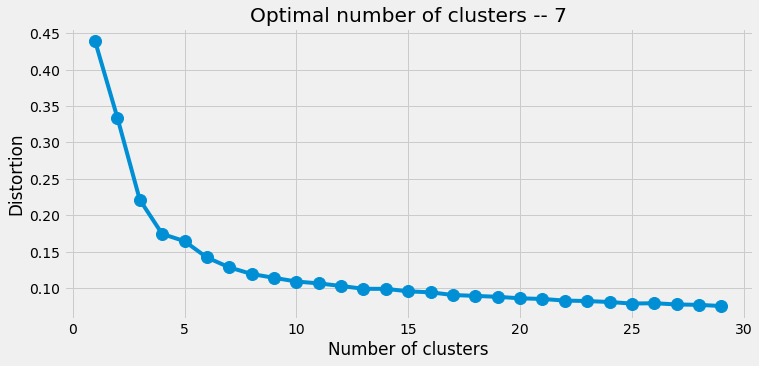

In [40]:
# Finding the optimal number of clusters
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000).fit(normalized_df)
    kmeanModel.fit(normalized_df)
    distortions.append(sum(np.min(cdist(normalized_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
plt.figure(figsize=(11, 5))
plt.plot(K, distortions, 'o-', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Optimal number of clusters -- 7')
plt.show()

In [ ]:
normalized_df = normalized_df.fillna(0)
plt.figure(figsize=(7, 7))
pca_df = pd.DataFrame(PCA(n_components=2).fit_transform(normalized_df))
pca_df['locations'] = locations
pca_df['sizes'] = sizes

plt.scatter(pca_df[0], pca_df[1], s=50, alpha=0.6)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()    

## 3.1. Kmeans <a class="anchor" id="kmeans"></a>

In [ ]:
# Сluster analysis (k-means)
kmeanModel = KMeans(n_clusters=7, max_iter=10000).fit(df)
df_clusts = pd.DataFrame({'ID': df.index, 'clusts': kmeanModel.labels_})

# Add Clusters to DF
df = pd.merge(df, df_clusts, right_on='ID', left_index=True)

In [ ]:
centroids = kmeanModel.cluster_centers_
print(centroids)

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(vectors[:, 0], vectors[:, 1], c=y)
plt.title("Incorrect Number of Blobs")

In [ ]:
# Add top parties in each cluster
data = df.drop('ID', axis=1)
data = data.groupby('clusts').sum()
for i in data.index:
    data.iloc[i,:] = round(data.iloc[i,:]/data.iloc[i,:].sum()*100, 2).tolist()
data1 = pd.DataFrame({'clusts': data.index,
                     'party': str(data.index)})
for i in data.index:
    reg = re.sub(' {2,}', ' - ', str(data.iloc[i,:].sort_values(ascending=False)[0:5]))
    reg = re.sub('\n', ', ', reg)
    reg = re.sub(', Name:.*', '', reg)
    data1.iloc[i,1] = reg
data = data1
del data1

# Add cities from top-50 in each clust
data['cities'] = 'text'
settles = df[['ID', 'clusts']]
settles.index = settles.pop('ID')
settles = settles.filter(items=settl_top.head(50).settlement.tolist(), axis=0).reset_index()
for i in set(data.clusts):
    reg = ', '.join(settles.ID[settles.clusts == i])
    data.ix[i,'cities'] = reg

# Add number of all cities in each cluster
data = pd.merge(data, df.groupby('clusts')['ID'].count().reset_index())
data = data.drop('clusts', axis=1)
data.columns = ['Top-5 parties by % of votes in the cluster', 
                'The biggest (of The Top-50) cities in the cluster',
                'All cities in the clust (amount)']

In [ ]:
# Сluster analysis (k-means)
kmeanModel = KMeans(n_clusters=7, max_iter=10000).fit(df)
df_clusts = pd.DataFrame({'ID': df.index, 'clusts': kmeanModel.labels_})

# Add Clusters to DF
df = pd.merge(df, df_clusts, right_on='ID', left_index=True)

In [ ]:
df

In [ ]:
centroids = kmeanModel.cluster_centers_
print(centroids)

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(vectors[:, 0], vectors[:, 1], c=y)
plt.title("Incorrect Number of Blobs")

In [ ]:
# Add top parties in each cluster
data = df.drop('ID', axis=1)
data = data.groupby('clusts').sum()
for i in data.index:
    data.iloc[i,:] = round(data.iloc[i,:]/data.iloc[i,:].sum()*100, 2).tolist()
data1 = pd.DataFrame({'clusts': data.index,
                     'party': str(data.index)})
for i in data.index:
    reg = re.sub(' {2,}', ' - ', str(data.iloc[i,:].sort_values(ascending=False)[0:5]))
    reg = re.sub('\n', ', ', reg)
    reg = re.sub(', Name:.*', '', reg)
    data1.iloc[i,1] = reg
data = data1
del data1

# Add cities from top-50 in each clust
data['cities'] = 'text'
settles = df[['ID', 'clusts']]
settles.index = settles.pop('ID')
settles = settles.filter(items=settl_top.head(50).settlement.tolist(), axis=0).reset_index()
for i in set(data.clusts):
    reg = ', '.join(settles.ID[settles.clusts == i])
    data.ix[i,'cities'] = reg

# Add number of all cities in each cluster
data = pd.merge(data, df.groupby('clusts')['ID'].count().reset_index())
data = data.drop('clusts', axis=1)
data.columns = ['Top-5 parties by % of votes in the cluster', 
                'The biggest (of The Top-50) cities in the cluster',
                'All cities in the clust (amount)']

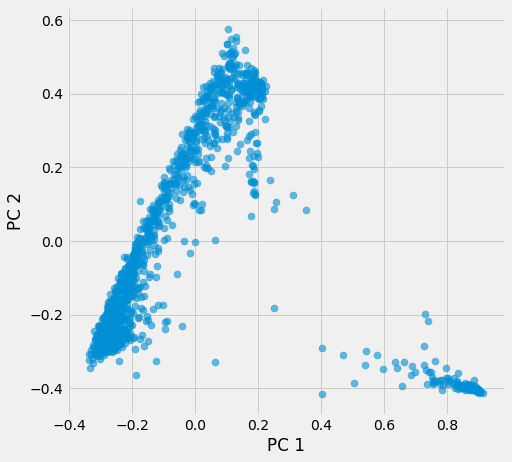

In [41]:
# Add top parties in each cluster
data = df.drop('ID', axis=1)
data = data.groupby('clusts').sum()
for i in data.index:
    data.iloc[i,:] = round(data.iloc[i,:]/data.iloc[i,:].sum()*100, 2).tolist()
data1 = pd.DataFrame({'clusts': data.index,
                     'party': str(data.index)})
for i in data.index:
    reg = re.sub(' {2,}', ' - ', str(data.iloc[i,:].sort_values(ascending=False)[0:5]))
    reg = re.sub('\n', ', ', reg)
    reg = re.sub(', Name:.*', '', reg)
    data1.iloc[i,1] = reg
data = data1
del data1

# Add cities from top-50 in each clust
data['cities'] = 'text'
settles = df[['ID', 'clusts']]
settles.index = settles.pop('ID')
settles = settles.filter(items=settl_top.head(50).settlement.tolist(), axis=0).reset_index()
for i in set(data.clusts):
    reg = ', '.join(settles.ID[settles.clusts == i])
    data.ix[i,'cities'] = reg

# Add number of all cities in each cluster
data = pd.merge(data, df.groupby('clusts')['ID'].count().reset_index())
data = data.drop('clusts', axis=1)
data.columns = ['Top-5 parties by % of votes in the cluster', 
                'The biggest (of The Top-50) cities in the cluster',
                'All cities in the clust (amount)']

## 3.1. Kmeans <a class="anchor" id="kmeans"></a>

In [ ]:
# Сluster analysis (k-means)
kmeanModel = KMeans(n_clusters=7, max_iter=10000).fit(df)
df_clusts = pd.DataFrame({'ID': df.index, 'clusts': kmeanModel.labels_})

# Add Clusters to DF
df = pd.merge(df, df_clusts, right_on='ID', left_index=True)

In [ ]:
centroids = kmeanModel.cluster_centers_
print(centroids)

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(vectors[:, 0], vectors[:, 1], c=y)
plt.title("Incorrect Number of Blobs")

In [ ]:
# Add top parties in each cluster
data = df.drop('ID', axis=1)
data = data.groupby('clusts').sum()
for i in data.index:
    data.iloc[i,:] = round(data.iloc[i,:]/data.iloc[i,:].sum()*100, 2).tolist()
data1 = pd.DataFrame({'clusts': data.index,
                     'party': str(data.index)})
for i in data.index:
    reg = re.sub(' {2,}', ' - ', str(data.iloc[i,:].sort_values(ascending=False)[0:5]))
    reg = re.sub('\n', ', ', reg)
    reg = re.sub(', Name:.*', '', reg)
    data1.iloc[i,1] = reg
data = data1
del data1

# Add cities from top-50 in each clust
data['cities'] = 'text'
settles = df[['ID', 'clusts']]
settles.index = settles.pop('ID')
settles = settles.filter(items=settl_top.head(50).settlement.tolist(), axis=0).reset_index()
for i in set(data.clusts):
    reg = ', '.join(settles.ID[settles.clusts == i])
    data.ix[i,'cities'] = reg

# Add number of all cities in each cluster
data = pd.merge(data, df.groupby('clusts')['ID'].count().reset_index())
data = data.drop('clusts', axis=1)
data.columns = ['Top-5 parties by % of votes in the cluster', 
                'The biggest (of The Top-50) cities in the cluster',
                'All cities in the clust (amount)']

In [53]:
# Сluster analysis (k-means)
kmeanModel = KMeans(n_clusters=7, max_iter=10000).fit(df)
df_clusts = pd.DataFrame({'ID': df.index, 'clusts': kmeanModel.labels_})

# Add Clusters to DF
df = pd.merge(df, df_clusts, right_on='ID', left_index=True)

In [56]:
df

,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,...,פה,ףז,ץ,ק,קי,קך,קץ,שס,ID,clusts
0,13,0,554,0,0,0,0,0,1,0,...,8,2,0,0,0,0,2,2,אבו גווייעד שבט,0
1,75,4,2157,0,0,0,5,0,0,5,...,123,0,2,0,0,1,4,14,אבו גוש,0
2,92,6,4458,0,1,0,16,1,2,13,...,752,0,2,2,1,2,4,247,אבו סנאן,0
3,0,0,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,אבו עבדון שבט,0
4,9,0,1263,0,0,0,1,0,0,3,...,33,0,2,1,0,2,1,0,אבו קורינאת שבט,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,5,5,0,0,0,0,163,0,0,0,...,63,0,0,0,0,0,0,12,תקומה,0
1210,28,33,3,7,0,0,760,0,0,0,...,85,2,0,1,0,2,5,34,תקוע,0
1211,0,0,43,0,1,0,0,0,0,0,...,4,0,0,0,0,0,0,0,תראבין אצאנע שבט,0
1212,0,0,160,0,0,0,0,0,0,1,...,2,1,0,1,0,0,0,0,תראבין אצאנעישוב,0


In [62]:
centroids = kmeanModel.cluster_centers_
print(centroids)

[[7.29477352e+01 6.37325784e+01 2.03646341e+02 7.83972125e-01
  4.35540070e-02 0.00000000e+00 8.21367596e+01 5.40069686e-02
  7.40418118e-02 2.50000000e-01 5.31358885e-02 1.13240418e-01
  6.96864111e-02 1.12369338e-01 2.03832753e-01 4.46297909e+01
  2.77518293e+02 6.75087108e-01 1.55052265e-01 8.36236934e-02
  6.04616725e+00 2.00348432e-01 2.86106272e+02 2.95296167e-01
  1.55923345e-01 2.38675958e-01 1.11498258e-01 1.89024390e-01
  4.17247387e-01 7.74965157e+01]
 [5.45725000e+03 4.21800000e+03 2.12187500e+03 1.03750000e+02
  5.87500000e+00 0.00000000e+00 5.08575000e+03 1.40000000e+01
  7.62500000e+00 3.37500000e+00 6.75000000e+00 8.37500000e+00
  7.75000000e+00 1.11250000e+01 2.60000000e+01 1.14151250e+04
  4.36501250e+04 7.91250000e+01 1.53750000e+01 8.37500000e+00
  4.12125000e+02 1.00000000e+01 3.40961250e+04 3.18750000e+01
  1.77500000e+01 2.66250000e+01 1.01250000e+01 1.55000000e+01
  3.38750000e+01 9.24325000e+03]
 [1.73020000e+03 2.49871429e+03 7.06285714e+02 2.62285714e+01
  1.

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(vectors[:, 0], vectors[:, 1], c=y)
plt.title("Incorrect Number of Blobs")

In [54]:
# Add top parties in each cluster
data = df.drop('ID', axis=1)
data = data.groupby('clusts').sum()
for i in data.index:
    data.iloc[i,:] = round(data.iloc[i,:]/data.iloc[i,:].sum()*100, 2).tolist()
data1 = pd.DataFrame({'clusts': data.index,
                     'party': str(data.index)})
for i in data.index:
    reg = re.sub(' {2,}', ' - ', str(data.iloc[i,:].sort_values(ascending=False)[0:5]))
    reg = re.sub('\n', ', ', reg)
    reg = re.sub(', Name:.*', '', reg)
    data1.iloc[i,1] = reg
data = data1
del data1

# Add cities from top-50 in each clust
data['cities'] = 'text'
settles = df[['ID', 'clusts']]
settles.index = settles.pop('ID')
settles = settles.filter(items=settl_top.head(50).settlement.tolist(), axis=0).reset_index()
for i in set(data.clusts):
    reg = ', '.join(settles.ID[settles.clusts == i])
    data.ix[i,'cities'] = reg

# Add number of all cities in each cluster
data = pd.merge(data, df.groupby('clusts')['ID'].count().reset_index())
data = data.drop('clusts', axis=1)
data.columns = ['Top-5 parties by % of votes in the cluster', 
                'The biggest (of The Top-50) cities in the cluster',
                'All cities in the clust (amount)']

AttributeError: 'DataFrame' object has no attribute 'ix'